# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [1]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adadelta
from keras.utils import np_utils
from sklearn import metrics as me
from tensorflow.keras.backend import clear_session
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: gast>=0.2.1 in c:\users\nelsonwork\appdata\local\programs\python\python39\lib\site-packages (from tensorflow) (0.5.3)


You should consider upgrading via the 'C:\Users\NelsonWork\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\NelsonWork\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [3]:
def measure_model_perf(model, X_test, Y_test, history, title):
    score = model.evaluate(X_test, Y_test, verbose=1)
    pl.clf()
    pl.plot(history.history['loss'], label='Training')
    pl.plot(history.history['val_loss'], label='Testing')
    pl.ylabel('loss')
    pl.xlabel('Number of epochs')
    pl.title(title + ' Test accuracy: ' + str(round(score[1] * 100, 2)) + '%')
    pl.legend()
    pl.grid()
    pl.savefig('../output/perf/' + title + '.png', dpi=500)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2783 - accuracy: 0.9212 - val_loss: 0.1447 - val_accuracy: 0.9576
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1210 - accuracy: 0.9645 - val_loss: 0.0955 - val_accuracy: 0.9707
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0812 - accuracy: 0.9761 - val_loss: 0.0828 - val_accuracy: 0.9746
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0604 - accuracy: 0.9821 - val_loss: 0.0754 - val_accuracy: 0.9778
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0469 - accuracy: 0.9861 - val_loss: 0.0711 - val_accuracy: 0.9785
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0370 - accuracy: 0.9891 - val_loss: 0.0706 - val_accuracy: 0.9789
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0298 - accuracy: 0.9916 - val_loss: 0.0665 - val_accuracy: 0.9798
Epoch 

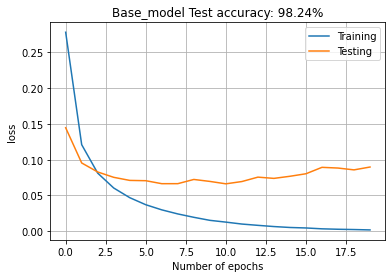

In [4]:
from tensorflow import keras

batch_size = 128
n_epoch = 20
learning_rate = 0.005
title = 'Base_model'

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

98% is already a pretty good score for the model. But we'll try finding better performance by using different optimizers

Epoch 1/20
300/300 [==============================] - 8s 23ms/step - loss: 0.3353 - accuracy: 0.9072 - val_loss: 0.1749 - val_accuracy: 0.9494
Epoch 2/20
300/300 [==============================] - 7s 23ms/step - loss: 0.1454 - accuracy: 0.9575 - val_loss: 0.1219 - val_accuracy: 0.9634
Epoch 3/20
300/300 [==============================] - 6s 21ms/step - loss: 0.0996 - accuracy: 0.9711 - val_loss: 0.1005 - val_accuracy: 0.9698
Epoch 4/20
300/300 [==============================] - 6s 21ms/step - loss: 0.0749 - accuracy: 0.9784 - val_loss: 0.0835 - val_accuracy: 0.9748
Epoch 5/20
300/300 [==============================] - 6s 21ms/step - loss: 0.0579 - accuracy: 0.9834 - val_loss: 0.0849 - val_accuracy: 0.9742
Epoch 6/20
300/300 [==============================] - 6s 22ms/step - loss: 0.0460 - accuracy: 0.9874 - val_loss: 0.0769 - val_accuracy: 0.9763
Epoch 7/20
300/300 [==============================] - 6s 21ms/step - loss: 0.0365 - accuracy: 0.9903 - val_loss: 0.0710 - val_accuracy: 0.9773

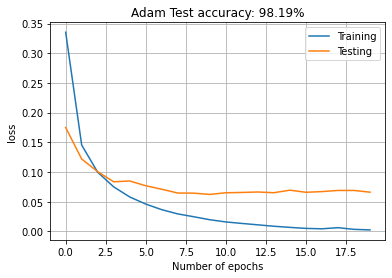

In [232]:
batch_size = 200
n_epoch = 20

title = 'Adam'

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

adam = keras.optimizers.Adam()

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/200
300/300 [==============================] - 8s 23ms/step - loss: 2.4032 - accuracy: 0.0835 - val_loss: 2.3461 - val_accuracy: 0.1051
Epoch 2/200
300/300 [==============================] - 8s 26ms/step - loss: 2.3064 - accuracy: 0.1227 - val_loss: 2.2495 - val_accuracy: 0.1634
Epoch 3/200
300/300 [==============================] - 6s 22ms/step - loss: 2.2137 - accuracy: 0.1913 - val_loss: 2.1570 - val_accuracy: 0.2441
Epoch 4/200
300/300 [==============================] - 8s 27ms/step - loss: 2.1249 - accuracy: 0.2729 - val_loss: 2.0683 - val_accuracy: 0.3375
Epoch 5/200
300/300 [==============================] - 8s 26ms/step - loss: 2.0396 - accuracy: 0.3633 - val_loss: 1.9833 - val_accuracy: 0.4269
Epoch 6/200
300/300 [==============================] - 8s 27ms/step - loss: 1.9577 - accuracy: 0.4459 - val_loss: 1.9017 - val_accuracy: 0.4995
Epoch 7/200
300/300 [==============================] - 8s 28ms/step - loss: 1.8788 - accuracy: 0.5182 - val_loss: 1.8228 - val_accuracy:

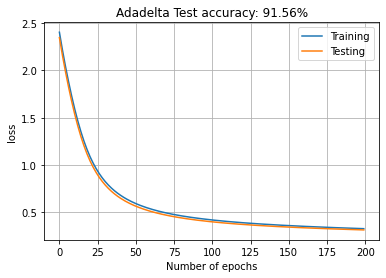

In [233]:
batch_size = 200
n_epoch = 200
title = 'Adadelta'
adadelta = keras.optimizers.Adadelta()

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adadelta, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/200
300/300 [==============================] - 8s 23ms/step - loss: 1.8763 - accuracy: 0.4990 - val_loss: 1.5203 - val_accuracy: 0.6980
Epoch 2/200
300/300 [==============================] - 7s 22ms/step - loss: 1.3092 - accuracy: 0.7465 - val_loss: 1.1035 - val_accuracy: 0.7869
Epoch 3/200
300/300 [==============================] - 6s 21ms/step - loss: 1.0036 - accuracy: 0.7978 - val_loss: 0.8797 - val_accuracy: 0.8184
Epoch 4/200
300/300 [==============================] - 7s 22ms/step - loss: 0.8326 - accuracy: 0.8221 - val_loss: 0.7484 - val_accuracy: 0.8367
Epoch 5/200
300/300 [==============================] - 7s 22ms/step - loss: 0.7269 - accuracy: 0.8368 - val_loss: 0.6634 - val_accuracy: 0.8505
Epoch 6/200
300/300 [==============================] - 7s 23ms/step - loss: 0.6556 - accuracy: 0.8481 - val_loss: 0.6041 - val_accuracy: 0.8614
Epoch 7/200
300/300 [==============================] - 7s 25ms/step - loss: 0.6041 - accuracy: 0.8564 - val_loss: 0.5601 - val_accuracy:

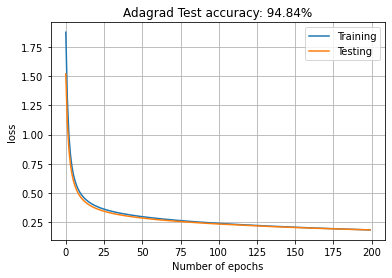

In [234]:
batch_size = 200
n_epoch = 200
title = 'Adagrad'
adagrad = keras.optimizers.Adagrad()

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/200
300/300 [==============================] - 9s 26ms/step - loss: 1.3153 - accuracy: 0.6931 - val_loss: 0.7739 - val_accuracy: 0.8403
Epoch 2/200
300/300 [==============================] - 7s 24ms/step - loss: 0.6485 - accuracy: 0.8522 - val_loss: 0.5287 - val_accuracy: 0.8763
Epoch 3/200
300/300 [==============================] - 7s 25ms/step - loss: 0.5012 - accuracy: 0.8756 - val_loss: 0.4415 - val_accuracy: 0.8893
Epoch 4/200
300/300 [==============================] - 8s 27ms/step - loss: 0.4365 - accuracy: 0.8866 - val_loss: 0.3955 - val_accuracy: 0.8979
Epoch 5/200
300/300 [==============================] - 8s 28ms/step - loss: 0.3988 - accuracy: 0.8944 - val_loss: 0.3667 - val_accuracy: 0.9046
Epoch 6/200
300/300 [==============================] - 8s 27ms/step - loss: 0.3735 - accuracy: 0.8989 - val_loss: 0.3466 - val_accuracy: 0.9072
Epoch 7/200
300/300 [==============================] - 8s 28ms/step - loss: 0.3548 - accuracy: 0.9033 - val_loss: 0.3315 - val_accuracy:

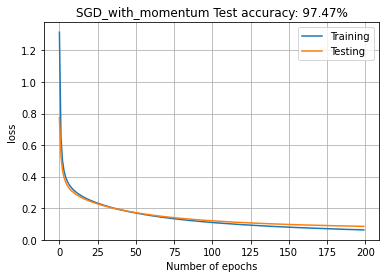

In [235]:
batch_size = 200
n_epoch = 200
title = 'SGD_with_momentum'
optimizer = keras.optimizers.SGD()

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/50
300/300 [==============================] - 3s 7ms/step - loss: 0.4481 - accuracy: 0.8826 - val_loss: 0.2625 - val_accuracy: 0.9268
Epoch 2/50
300/300 [==============================] - 2s 7ms/step - loss: 0.2377 - accuracy: 0.9342 - val_loss: 0.2006 - val_accuracy: 0.9437
Epoch 3/50
300/300 [==============================] - 2s 7ms/step - loss: 0.1860 - accuracy: 0.9488 - val_loss: 0.1666 - val_accuracy: 0.9537
Epoch 4/50
300/300 [==============================] - 2s 7ms/step - loss: 0.1531 - accuracy: 0.9572 - val_loss: 0.1399 - val_accuracy: 0.9600
Epoch 5/50
300/300 [==============================] - 2s 8ms/step - loss: 0.1295 - accuracy: 0.9644 - val_loss: 0.1264 - val_accuracy: 0.9632
Epoch 6/50
300/300 [==============================] - 2s 7ms/step - loss: 0.1113 - accuracy: 0.9696 - val_loss: 0.1119 - val_accuracy: 0.9679
Epoch 7/50
300/300 [==============================] - 2s 7ms/step - loss: 0.0971 - accuracy: 0.9728 - val_loss: 0.1002 - val_accuracy: 0.9700
Epoch 

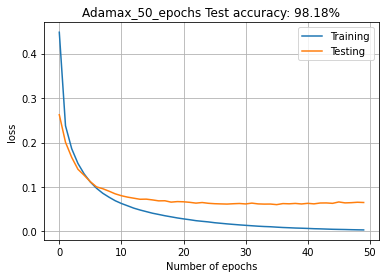

In [236]:
batch_size = 200
n_epoch = 50
title = 'Adamax_50_epochs'
optimizer = keras.optimizers.Adamax()

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/100
300/300 [==============================] - 3s 8ms/step - loss: 2.3025 - accuracy: 0.1113 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 2/100
300/300 [==============================] - 2s 8ms/step - loss: 2.3023 - accuracy: 0.1124 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 3/100
300/300 [==============================] - 2s 8ms/step - loss: 2.3022 - accuracy: 0.1124 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 4/100
300/300 [==============================] - 2s 7ms/step - loss: 2.3021 - accuracy: 0.1124 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 5/100
300/300 [==============================] - 2s 8ms/step - loss: 2.3018 - accuracy: 0.1124 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 6/100
300/300 [==============================] - 2s 7ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 7/100
300/300 [==============================] - 2s 7ms/step - loss: 2.3003 - accuracy: 0.1245 - val_loss: 2.2992 - val_accuracy: 0.1652

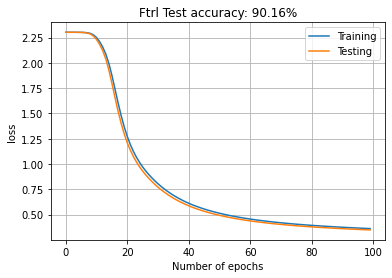

In [237]:
batch_size = 200
n_epoch = 100
title = 'Ftrl'
optimizer = keras.optimizers.Ftrl()

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/20
300/300 [==============================] - 4s 10ms/step - loss: 0.3470 - accuracy: 0.9072 - val_loss: 0.1722 - val_accuracy: 0.9501
Epoch 2/20
300/300 [==============================] - 3s 10ms/step - loss: 0.1444 - accuracy: 0.9584 - val_loss: 0.1229 - val_accuracy: 0.9645
Epoch 3/20
300/300 [==============================] - 3s 10ms/step - loss: 0.0997 - accuracy: 0.9717 - val_loss: 0.0923 - val_accuracy: 0.9723
Epoch 4/20
300/300 [==============================] - 3s 10ms/step - loss: 0.0738 - accuracy: 0.9791 - val_loss: 0.0865 - val_accuracy: 0.9745
Epoch 5/20
300/300 [==============================] - 3s 10ms/step - loss: 0.0574 - accuracy: 0.9839 - val_loss: 0.0827 - val_accuracy: 0.9739
Epoch 6/20
300/300 [==============================] - 3s 10ms/step - loss: 0.0459 - accuracy: 0.9871 - val_loss: 0.0731 - val_accuracy: 0.9779
Epoch 7/20
300/300 [==============================] - 3s 10ms/step - loss: 0.0364 - accuracy: 0.9905 - val_loss: 0.0713 - val_accuracy: 0.9788

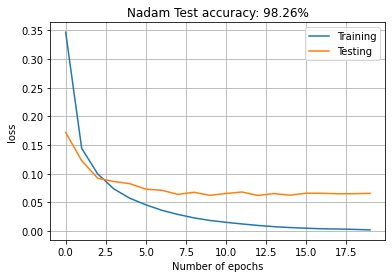

In [238]:
batch_size = 200
n_epoch = 20
title = 'Nadam'
optimizer = keras.optimizers.Nadam()

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Hyper param Tuning de RMSprop

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.3143 - accuracy: 0.9096 - val_loss: 0.1536 - val_accuracy: 0.9541
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1476 - accuracy: 0.9570 - val_loss: 0.1070 - val_accuracy: 0.9669
Epoch 3/20
469/469 [==============================] - 4s 10ms/step - loss: 0.1084 - accuracy: 0.9677 - val_loss: 0.0902 - val_accuracy: 0.9719
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0887 - accuracy: 0.9736 - val_loss: 0.0775 - val_accuracy: 0.9760
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0751 - accuracy: 0.9775 - val_loss: 0.0733 - val_accuracy: 0.9788
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0658 - accuracy: 0.9801 - val_loss: 0.0716 - val_accuracy: 0.9776
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0586 - accuracy: 0.9821 - val_loss: 0.0725 - val_accuracy: 0.9778
Epoch

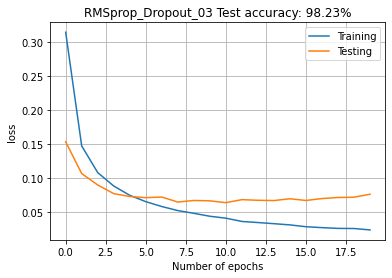

In [239]:
batch_size = 128
n_epoch = 20

title = 'RMSprop_Dropout_03'

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='softmax'))

optimizer = keras.optimizers.RMSprop()

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.3613 - accuracy: 0.8950 - val_loss: 0.1660 - val_accuracy: 0.9525
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1846 - accuracy: 0.9455 - val_loss: 0.1201 - val_accuracy: 0.9638
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1446 - accuracy: 0.9573 - val_loss: 0.1008 - val_accuracy: 0.9699
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1224 - accuracy: 0.9645 - val_loss: 0.0926 - val_accuracy: 0.9746
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1118 - accuracy: 0.9671 - val_loss: 0.0852 - val_accuracy: 0.9755
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1003 - accuracy: 0.9706 - val_loss: 0.0823 - val_accuracy: 0.9762
Epoch 7/20
469/469 [==============================] - 4s 10ms/step - loss: 0.0927 - accuracy: 0.9731 - val_loss: 0.0783 - val_accuracy: 0.9778
Epoch

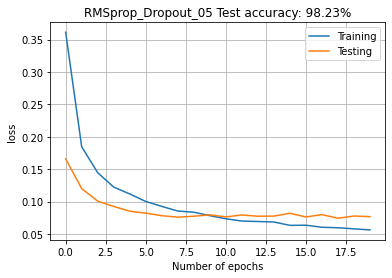

In [240]:
batch_size = 128
n_epoch = 20

title = 'RMSprop_Dropout_05'

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

optimizer = keras.optimizers.RMSprop()

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.3889 - accuracy: 0.8838 - val_loss: 0.1724 - val_accuracy: 0.9483
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1896 - accuracy: 0.9449 - val_loss: 0.1236 - val_accuracy: 0.9638
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1450 - accuracy: 0.9568 - val_loss: 0.1032 - val_accuracy: 0.9686
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1230 - accuracy: 0.9628 - val_loss: 0.0879 - val_accuracy: 0.9736
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1064 - accuracy: 0.9683 - val_loss: 0.0794 - val_accuracy: 0.9760
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0936 - accuracy: 0.9712 - val_loss: 0.0769 - val_accuracy: 0.9765
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0851 - accuracy: 0.9741 - val_loss: 0.0716 - val_accuracy: 0.9770
Epoch 

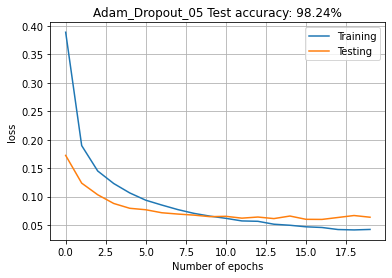

In [241]:
batch_size = 128
n_epoch = 20

title = 'Adam_Dropout_05'

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

optimizer = keras.optimizers.Adam()

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.3361 - accuracy: 0.9031 - val_loss: 0.1550 - val_accuracy: 0.9570
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1542 - accuracy: 0.9551 - val_loss: 0.1076 - val_accuracy: 0.9678
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1113 - accuracy: 0.9671 - val_loss: 0.0880 - val_accuracy: 0.9730
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0902 - accuracy: 0.9732 - val_loss: 0.0771 - val_accuracy: 0.9758
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0748 - accuracy: 0.9772 - val_loss: 0.0751 - val_accuracy: 0.9761
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0651 - accuracy: 0.9799 - val_loss: 0.0643 - val_accuracy: 0.9791
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0556 - accuracy: 0.9830 - val_loss: 0.0633 - val_accuracy: 0.9803
Epoc

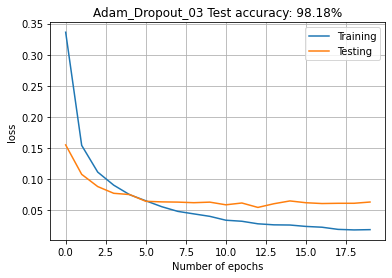

In [253]:
batch_size = 128
n_epoch = 20

title = 'Adam_Dropout_03'

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='softmax'))

optimizer = keras.optimizers.Adam()

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/20
469/469 [==============================] - 7s 15ms/step - loss: 0.2447 - accuracy: 0.9274 - val_loss: 0.1171 - val_accuracy: 0.9624
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0897 - accuracy: 0.9724 - val_loss: 0.0896 - val_accuracy: 0.9723
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0605 - accuracy: 0.9812 - val_loss: 0.0711 - val_accuracy: 0.9779
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0450 - accuracy: 0.9857 - val_loss: 0.0760 - val_accuracy: 0.9782
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0349 - accuracy: 0.9885 - val_loss: 0.0747 - val_accuracy: 0.9783
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0770 - val_accuracy: 0.9783
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0252 - accuracy: 0.9915 - val_loss: 0.1011 - val_accuracy: 0.9766

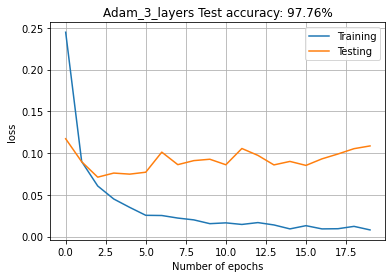

In [243]:
batch_size = 128
n_epoch = 20

title = 'Adam_3_layers'

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

optimizer = keras.optimizers.Adam()

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3493 - accuracy: 0.8923 - val_loss: 0.1195 - val_accuracy: 0.9631
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1483 - accuracy: 0.9553 - val_loss: 0.1016 - val_accuracy: 0.9684
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1146 - accuracy: 0.9654 - val_loss: 0.0803 - val_accuracy: 0.9774
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0906 - accuracy: 0.9720 - val_loss: 0.0808 - val_accuracy: 0.9755
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0844 - accuracy: 0.9732 - val_loss: 0.0759 - val_accuracy: 0.9764
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0735 - accuracy: 0.9773 - val_loss: 0.0866 - val_accuracy: 0.9752
Epoch 7/20
469/469 [==============================] - 4s 7ms/step - loss: 0.0667 - accuracy: 0.9783 - val_loss: 0.0649 - val_accuracy: 0.9815
Epoch 

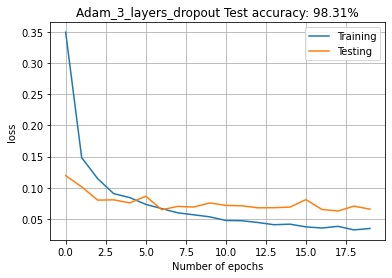

In [5]:
batch_size = 128
n_epoch = 20

title = 'Adam_3_layers_dropout'

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='softmax'))

optimizer = keras.optimizers.Adam()

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)
model.summary()

Epoch 1/20
469/469 [==============================] - 12s 22ms/step - loss: 0.7606 - accuracy: 0.7536 - val_loss: 0.2814 - val_accuracy: 0.9114
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2846 - accuracy: 0.9145 - val_loss: 0.1999 - val_accuracy: 0.9382
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2174 - accuracy: 0.9344 - val_loss: 0.1562 - val_accuracy: 0.9523
Epoch 4/20
469/469 [==============================] - 8s 18ms/step - loss: 0.1754 - accuracy: 0.9463 - val_loss: 0.1307 - val_accuracy: 0.9581
Epoch 5/20
469/469 [==============================] - 8s 18ms/step - loss: 0.1499 - accuracy: 0.9553 - val_loss: 0.1169 - val_accuracy: 0.9637
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1307 - accuracy: 0.9599 - val_loss: 0.1005 - val_accuracy: 0.9711
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1152 - accuracy: 0.9648 - val_loss: 0.0988 - val_accuracy: 0.969

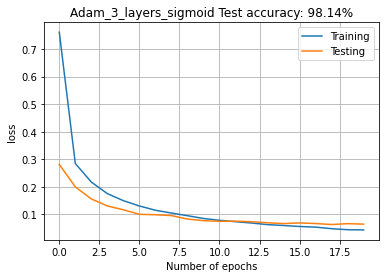

In [248]:
batch_size = 128
n_epoch = 20

title = 'Adam_3_layers_sigmoid'

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(300, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(300, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='softmax'))

optimizer = keras.optimizers.Adam()

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/20


C:\Users\NelsonWork\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


469/469 [==============================] - 10s 19ms/step - loss: 201.6372 - accuracy: 0.1037 - val_loss: 2.3079 - val_accuracy: 0.1010
Epoch 2/20
469/469 [==============================] - 9s 20ms/step - loss: 2.4372 - accuracy: 0.1026 - val_loss: 2.3216 - val_accuracy: 0.0980
Epoch 3/20
469/469 [==============================] - 9s 20ms/step - loss: 144.9050 - accuracy: 0.1046 - val_loss: 2.3108 - val_accuracy: 0.1135
Epoch 4/20
469/469 [==============================] - 8s 18ms/step - loss: 3.1708 - accuracy: 0.1011 - val_loss: 2.3189 - val_accuracy: 0.1135
Epoch 5/20
469/469 [==============================] - 8s 18ms/step - loss: 2.3538 - accuracy: 0.1035 - val_loss: 2.3164 - val_accuracy: 0.0974
Epoch 6/20
469/469 [==============================] - 8s 18ms/step - loss: 2.6620 - accuracy: 0.1022 - val_loss: 2.3248 - val_accuracy: 0.1010
Epoch 7/20
469/469 [==============================] - 9s 20ms/step - loss: 4.5378 - accuracy: 0.1019 - val_loss: 2.3132 - val_accuracy: 0.0980
Epoch

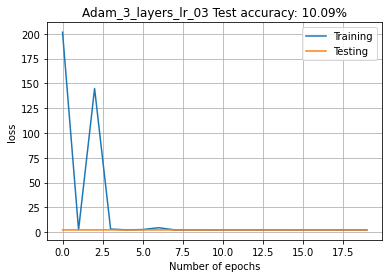

In [250]:
batch_size = 128
n_epoch = 20

title = 'Adam_3_layers_lr_03'

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='softmax'))

optimizer = keras.optimizers.Adam(lr=0.3)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/20
469/469 [==============================] - 10s 20ms/step - loss: 2.4877 - accuracy: 0.2402 - val_loss: 1.7970 - val_accuracy: 0.3657
Epoch 2/20
469/469 [==============================] - 12s 25ms/step - loss: 1.9598 - accuracy: 0.2619 - val_loss: 1.6924 - val_accuracy: 0.3541
Epoch 3/20
469/469 [==============================] - 13s 27ms/step - loss: 1.9131 - accuracy: 0.2671 - val_loss: 1.5464 - val_accuracy: 0.3819
Epoch 4/20
469/469 [==============================] - 11s 24ms/step - loss: 1.9180 - accuracy: 0.2584 - val_loss: 1.6544 - val_accuracy: 0.3336
Epoch 5/20
469/469 [==============================] - 18s 39ms/step - loss: 1.9661 - accuracy: 0.2493 - val_loss: 1.5768 - val_accuracy: 0.3741
Epoch 6/20
469/469 [==============================] - 10s 21ms/step - loss: 1.9646 - accuracy: 0.2405 - val_loss: 1.6298 - val_accuracy: 0.3747
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 1.9846 - accuracy: 0.2298 - val_loss: 1.6536 - val_accuracy: 

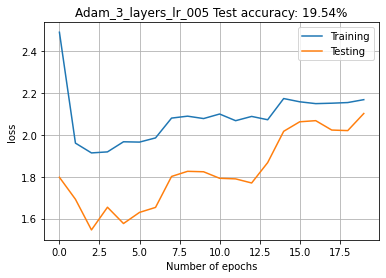

In [251]:
batch_size = 128
n_epoch = 20

title = 'Adam_3_layers_lr_005'

model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='softmax'))

optimizer = keras.optimizers.Adam(lr=0.05)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

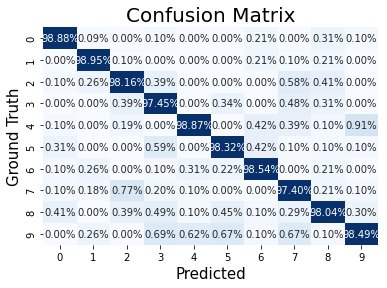

In [6]:
import seaborn as sn
import pandas as pd

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)


df_cm = pd.DataFrame(me.confusion_matrix(y_test, pred))
ax = sn.heatmap(df_cm/np.sum(df_cm), annot=True,
            fmt='.2%', cmap='Blues', vmax=0.05, cbar=False)

pl.title('Confusion Matrix', fontsize = 20) # title with fontsize 20
pl.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
pl.ylabel('Ground Truth', fontsize = 15) # y-axis label with fontsize 15

pl.show()